# Memoryless Distributions

## Overview

Markov processes are, by definition, forgetful.

In particular, for any Markov processes, the distribution over future outcomes
depends only on the current state, rather than the entire history.

In the case of continuous time Markov chains, which jump between discrete
states, this requires that the amount of elapsed time since the last jump is
not helpful in predicting the timing of the next jump.

In other words, the jump times are “memoryless”.

It is remarkable that the only distribution on $ \RR_+ $ with this
property is the exponential distribution.

Similarly, the only memoryless distribution on $ \ZZ_+ $ is the geometric
distribution.

This lecture tries to clarify these ideas.

We will use the following imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
from numba import njit
from scipy.special import factorial, binom

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## The Geometric Distribution

Consider betting on a roulette wheel and suppose that red has come up four times in a row.

Since five reds in a row is an unlikely event, many people instinctively feel
that black is more likely on the fifth spin — “Surely black will come up this time!”

But rational thought tells us such instincts are wrong: the four previous reds make no
difference to the outcome of the next spin.

(Many casinos offer an unlimited supply of free alcoholic beverages in order to discourage this kind of rational analysis.)

A mathematical restatement of this phenomenon is: the geometric distribution is memoryless.

### Memorylessness

Let $ X $ be a random variable supported on the nonnegative integers $ \ZZ_+ $.

We say that $ X $ is [geometrically distributed](https://en.wikipedia.org/wiki/Geometric_distribution) if, for some $ \theta $ satisfying $ 0 \leq \theta \leq 1 $,


<a id='equation-geodist'></a>
$$
\PP\{X = k\} = (1-\theta)^k \theta 
    \qquad (k = 0, 1, \ldots) \tag{1.1}
$$

An example can be constructed from the discussion of the roulette wheel above.

Suppose that,

- the outcome of each spin is either red or black,  
- spins are labeled by $ 0, 1, 2, \ldots $,  
- on each spin, black occurs with probability $ \theta $ and  
- outcomes across spins are independent.  


Then [(1.1)](#equation-geodist) is the probability that the first occurrence of black is at spin $ k $.

(The outcome “black” fails $ k $ times and then succeeds.)

Consistent with our discussion in the introduction, the geometric distribution
is **memoryless**.

In particular, given any nonnegative integer $ m $, we have


<a id='equation-memgeo'></a>
$$
\PP \{X = m + 1 \,|\, X > m \} = \theta \tag{1.2}
$$

In other words, regardless of how long we have seen only red outcomes, the
probability of black on the next spin is the same as the unconditional
probability of getting black on the very first spin.

To establish [(1.2)](#equation-memgeo), we use basic properties of the geometric
distribution to obtain.

$$
\frac{ \PP \{X = m + 1 \text{ and } X > m \} }
    {\PP \{X \geq m\}}
    =
    \frac{ \PP \{X = m + 1 \} }
    {\PP \{X > m\}}
    = \frac{ (1-\theta)^{m+1} \theta }
        {(1-\theta)^{m+1} }
    = \theta
$$

## The Exponential Distribution

Later, when we construct continuous time Markov chains, we will need to
specify the distribution of the holding times, which are the time intervals
between jumps.

As discussed above (and again below), the holding time distribution must be
memoryless, so that the chain satisfies the Markov property.

While the geometric distribution is memoryless, its discrete support makes it
a poor fit for the continuous time case.

Hence we turn to the [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution), which is supported on $ \RR_+ $.

A random variable $ Y $ on $ \RR_+ $ is called **exponential with rate $ \lambda $**, denoted by $ Y \sim \Exp(\lambda) $, if

$$
\PP\{Y > y\} = e^{-\lambda y}
    \qquad (y \geq 0)
$$


<a id='geomtoexp'></a>

### From Geometric to Exponential

The exponential distribution can be regarded as the “limit” of the geometric
distribution.

To illustrate, let us suppose that

- customers enter a shop at discrete times $ t_0, t_1, \ldots $  
- these times are evenly spaced, so that $ h = t_{i+1} - t_i $ for some $ h > 0 $ and all $ i \in \ZZ_+ $  
- at each $ t_i $, either zero or one customers enter (no more because $ h $ is small)  
- entry at each $ t_i $ occurs with probability $ \lambda h $ and is independent over $ i $.  


The fact that the entry probability is proportional to $ h $ is important in
what follows.

You can imagine many customers passing by the shop, each entering
independently.

If we halve the time interval, then we also halve the probability that a
customer enters.

Let

- $ Y $ be the time of the first arrival at the shop,  
- $ t $ be a given positive number and  
- $ i(h) $ be the largest integer such that $ t_{i(h)} \leq t $.  


Note that, as $ h \to 0 $, the grid becomes finer and $ t_{i(h)} = i(h) h  \to t $.

Writing $ i(h) $ as $ i $ and using the geometric distribution, the probability that
the first arrival occurs after $ t_{i} $ is $ (1-\lambda h)^{i} $.

Hence

$$
\PP\{Y > t_{i} \}
    = (1-\lambda h)^i
    = \left( 1- \frac{\lambda i h}{i} \right)^i
$$

Using the fact that $ e^x = \lim_{i \to \infty}(1 + x/i)^i $ for all $ x $ and $ i
h = t_i \to t $, we obtain, for large $ i $,

$$
\PP\{Y > t\}
    \approx
    e^{- \lambda t}
$$

In this sense, the exponential is the limit of the geometric distribution.

### Memoryless Property of the Exponential Distribution

The exponential distribution is the only memoryless distribution supported on $ \RR_+ $, as the next theorem attests.

###  (Characterization of the Exponential Distribution)

If $ X $ is a random variable supported on $ \RR_+ $, then there exists a
$ \lambda > 0 $ such that $ X \sim \Exp(\lambda) $ if and only if, for all
positive $ s, t $,


<a id='equation-memexpo'></a>
$$
\PP \{X > s + t \,|\, X > s \} = \PP \{X > t\} \tag{1.3}
$$

Proof. To see that [(1.3)](#equation-memexpo) holds when $ X $ is exponential with rate $ \lambda $,
fix $ s, t > 0 $ and observe that

$$
\frac{ \PP \{X > s + t \text{ and } X > s \} }
    {\PP \{X > s\}}
    =
    \frac{ \PP \{X > s + t \} }
    {\PP \{X > s\}}
    = \frac{e^{-\lambda s - \lambda t}}{e^{-\lambda s}}
    = e^{-\lambda t}
$$

To see that the converse holds, let $ X $ be a random variable supported on $ \RR_+ $
such that [(1.3)](#equation-memexpo) holds.

The “exceedance” function $ f(s) := \PP\{X > s\} $ then has three properties:

1. $ f $ is decreasing on $ \RR_+ $,  
1. $ 0 < f(t) < 1 $ for all $ t > 0 $,  
1. $ f(s + t) = f(s) f(t) $ for all $ s, t > 0 $.  


The first property is common to all exceedance functions, the second is due to
the fact that $ X $ is supported on all of $ \RR_+ $, and the
third is [(1.3)](#equation-memexpo).

From these three properties we will show that


<a id='equation-implex'></a>
$$
f(t) = f(1)^t  \;\; \forall \, t \geq 0 \tag{1.4}
$$

This is sufficient to prove the claim because then $ \lambda := - \ln f(1) $ is a positive real number (by property 2) and, moreover,

$$
f(t) 
    = \exp( \ln ( f(1) ) t) 
    = \exp( - \lambda t)
$$

To see that [(1.4)](#equation-implex) holds, fix positive integers $ m,n $.

We can use property 3 to obtain both

$$
f(m/n) = f(1/n)^m
    \quad \text{and} \quad
    f(1) = f(1/n)^n
$$

It follows that $ f(m/n)^n = f(1/n)^{m n} = f(1)^m $ and, raising to the power
of $ 1/n $, we get [(1.4)](#equation-implex) when $ t=m/n $.

The discussion so far confirms that [(1.4)](#equation-implex) holds when $ t $ is rational.

So now take any $ t \geq 0 $ and rational sequences $ (a_n) $ and $ (b_n) $
converging to $ t $ with $ a_n \leq t \leq b_n $ for all $ n $.

By property 1 we have $ f(b_n) \leq f(t) \leq f(a_n) $ for all $ n $, so

$$
f(1)^{b_n} \leq f(t) \leq f(1)^{a_n}
    \quad \forall \, n \in \NN
$$

Taking the limit in $ n $ completes the proof.


<a id='fail-mem'></a>

### Failure of Memorylessness

We know from the proceeding section that any distribution on $ \RR_+ $ other
than the exponential distribution fails to be memoryless.

Here’s an example that helps to clarify (although the support of the distribution is a proper subset of $ \RR_+ $).

A random variable $ Y $ has the Pareto distribution with positive parameters $ t_0, \alpha $ if

$$
f(t) 
    := \PP\{Y > t\} 
    = 
    \begin{cases}
    1 & \text{ if } t \leq t_0
    \\
    (t_0 / t)^\alpha & \text{ if } t > t_0
    \end{cases}
$$

As a result,  with $ s > t_0 $,

$$
\PP \{Y > s + t \,|\, Y > s \}
    =
    \frac{ \PP \{Y > s + t \} }
    {\PP \{Y > s\}}
    = \left( \frac{t}{t + s} \right)^\alpha
$$

Since this probability falls with $ s $, the distribution is not memoryless.

If we have waited many hours for an event (i.e., $ s $ is large), then the
probability of waiting another hour is relatively small.

## Sums of Exponentials

A random variable $ W $ on $ \RR_+ $ is said to have the [Erlang
distribution](https://en.wikipedia.org/wiki/Erlang_distribution) if its
density has the form

$$
f(t) = \frac{\lambda^n  t^{n-1}}{(n-1)!} e^{-\lambda t}
    \qquad (t \geq 0)
$$

for some $ n \in \NN $ and $ \lambda > 0 $.

The parameters $ n $ and $ \lambda $ are called the **shape** and **rate**
parameters respectively.

The next figure shows the shape for two parameterizations.

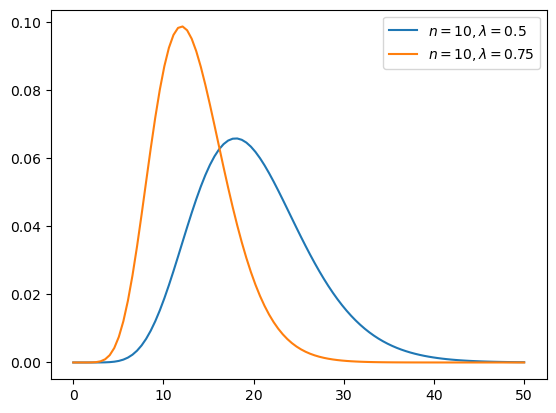

In [2]:
t_grid = np.linspace(0, 50, 100)

class Erlang:

    def __init__(self, λ=0.5, n=10):
        self.λ, self.n = λ, n

    def __call__(self, t):
        n, λ = self.n, self.λ
        return (λ**n * t**(n-1) * np.exp(-λ * t)) / factorial(n-1)

e1 = Erlang(n=10, λ=0.5)
e2 = Erlang(n=10, λ=0.75)

fig, ax = plt.subplots()
for e in e1, e2:
    ax.plot(t_grid, e(t_grid), label=f'$n={e.n}, \lambda={e.λ}$')

ax.legend()
plt.show()

The CDF of the Erlang distribution is


<a id='equation-erlcdf'></a>
$$
F(t) 
    = \PP\{W \leq t\}
    = 1 - \sum_{k=0}^{n-1} \frac{(\lambda t)^k}{k!} e^{-\lambda t} \tag{1.5}
$$

The Erlang distribution is of interest to us because of the following fact.

##  (Distribution of Sum of Exponentials)

If, for some $ \lambda > 0 $, the sequence $ (W_i) $ is IID and exponentially
distributed with rate $ \lambda $, then $ J_n := \sum_{i=1}^n W_i $ has the Erlang
distribution with shape $ n $ and rate $ \lambda $.

This connects to Poisson process theory, as we shall soon see.

## Exercises

## Exercise 

Due to its memoryless property, we can “stop” and “restart” an exponential
draw without changing its distribution.

To illustrate this, we can think of fixing $ \lambda > 0 $, drawing from
$ \Exp(\lambda) $, and stopping and restarting whenever a threshold $ s $ is crossed.

In particular, consider the random variable $ X $ defined as follows:

- Draw $ Y $ from $ \Exp(\lambda) $.  
- If $ Y \leq s $, set $ X = Y $.  
- If not, draw $ Z $ independently from $ \Exp(\lambda) $ and set $ X = s + Z $.  


Show that $ X \sim \Exp(\lambda) $.

## Exercise 

Fix $ \lambda = 0.5 $ and $ s=1.0 $.

Simulate 1,000 draws of $ X $ using the algorithm above.

Plot the fraction of the sample exceeding $ t $ for each $ t \geq 0 $ (on a grid)
and compare to $ t \mapsto e^{-\lambda t} $.

Is the fit good?  How about if the number of draws is increased?

Are the results in line with those of the previous exercise?

## Solutions

>**Note**
>
>code is currently not supported in `sphinx-exercise`
so code-cell solutions are immediately after this
solution block.

## [Solution to  Exercise 1.1](https://jstac.github.io/continuous_time_mcs/#memoryless-ex-1)

Let $ X $ be constructed as in the statement of the exercise and fix $ t > 0 $.

Notice that $ X > s + t $ if and only if $ Y > s $ and $ Z > t $.

As a result of this fact and independence,

$$
\PP\{X > s + t\}
    = \PP\{Y > s \} \PP\{Z > t\}
    = e^{-\lambda(s + t)}
$$

At the same time, $ X > s-t $ if and only if $ Y > s-t $, so

$$
\PP\{X > s - t\}
    = \PP\{Y > s - t \} 
    = e^{-\lambda(s - t)}
$$

Either way, we have $ X \sim \Exp(\lambda) $, as was to be shown.

## [Solution to  Exercise 1.2](https://jstac.github.io/continuous_time_mcs/#memoryless-ex-2)

Here’s one solution, starting with 1,000 draws.

In [ ]:
λ = 0.5 
np.random.seed(1234)
t_grid = np.linspace(0, 10, 200)

@njit
def draw_X(s=1.0, n=1_000):
    draws = np.empty(n)
    for i in range(n):
        Y = np.random.exponential(scale=1/λ)
        if Y <= s:
            X = Y
        else:
            Z = np.random.exponential(scale=1/λ)
            X = s + Z
        draws[i] = X
    return draws

fig, ax = plt.subplots()
draws = draw_X()
empirical_exceedance = [np.mean(draws > t) for t in t_grid]
ax.plot(t_grid, np.exp(- λ * t_grid), label='exponential exceedance')
ax.plot(t_grid, empirical_exceedance, label='empirical exceedance')
ax.legend()

plt.show()

## [Solution to  Exercise 1.2](https://jstac.github.io/continuous_time_mcs/#memoryless-ex-2)

**Solution Continued:**

The fit is already very close, which matches with the theory in Exercise 1.

The two lines become indistinguishable as $ n $ is increased further.

In [ ]:
fig, ax = plt.subplots()
draws = draw_X(n=10_000)
empirical_exceedance = [np.mean(draws > t) for t in t_grid]
ax.plot(t_grid, np.exp(- λ * t_grid), label='exponential exceedance')
ax.plot(t_grid, empirical_exceedance, label='empirical exceedance')
ax.legend()

plt.show()